In [17]:

# Installer la bibliothèque NumPy utilisée pour effectuer des calculs numériques efficaces
!pip install numpy
# Installer la bibliothèque Pandas utilisée pour la manipulation et l'analyse des données
!pip install pandas

!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB 2.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Chargement du DataFrame à partir du fichier CSV
shoes_df = pd.read_csv('Shoe prices.csv')

In [20]:
# Affichage des informations de base sur le DataFrame
shoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [21]:
# Affichage des noms des colonnes du DataFrame
shoes_df.columns

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')

In [22]:
# Vérification des valeurs manquantes dans chaque colonne du DataFrame
shoes_df.isnull().sum()

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

In [23]:
# Affichage des statistiques descriptives du DataFrame
shoes_df.describe()


,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
count,1006,1006,1006,1006,1006,1006,1006,1006
unique,10,239,18,2,13,82,34,33
top,Nike,Sk8-Hi,Running,Men,US 8.5,Black,Mesh,$65.00
freq,118,39,332,535,132,178,308,121


In [24]:
# Affichage de la forme (nombre de lignes, nombre de colonnes) du DataFrame
shoes_df.shape

(1006, 8)

In [25]:
# Affichage d'un échantillon aléatoire de 4 lignes du DataFrame
shoes_df.sample(4)

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
458,Converse,All Star,Casual,Men,US 9,Navy,Canvas,$55.00
461,New Balance,Fresh Foam X Beacon v3,Running,Women,US 7,White/Grey,Mesh,$120.00
906,Skechers,Go Walk 6,Walking,Men,US 9.5,Black,Mesh,$60.00
197,Puma,Clyde All-Pro,Basketball,Men,US 9,White,Leather,$130.00


In [26]:
# Suppression de la colonne 'Model' du DataFrame
shoes_df = shoes_df.drop('Model', axis=1)

In [27]:
# Affichage des premières lignes du DataFrame après suppression de la colonne 'Model'
shoes_df.head()

,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [28]:
# Comptage des occurrences de chaque marque de chaussures
shoes_df['Brand'].value_counts()

Brand
Nike           118
Adidas         100
Reebok         100
Converse       100
Puma           100
Vans           100
New Balance    100
Asics          100
Fila            99
Skechers        89
Name: count, dtype: int64

<Axes: xlabel='Brand'>

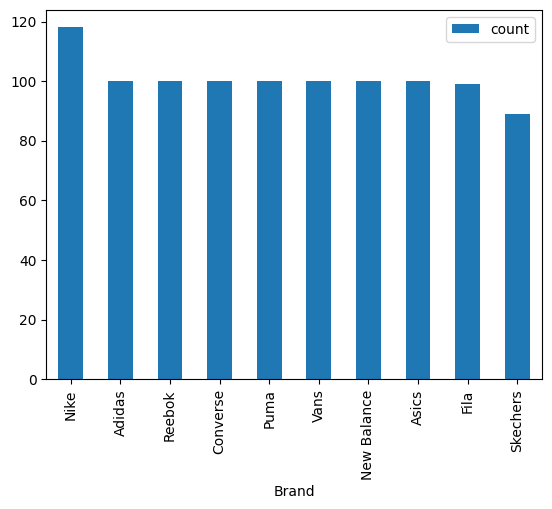

In [29]:
# Tracé du décompte de chaque marque de chaussures sous forme de diagramme à barres
shoes_df['Brand'].value_counts().plot(kind='bar', legend='false')


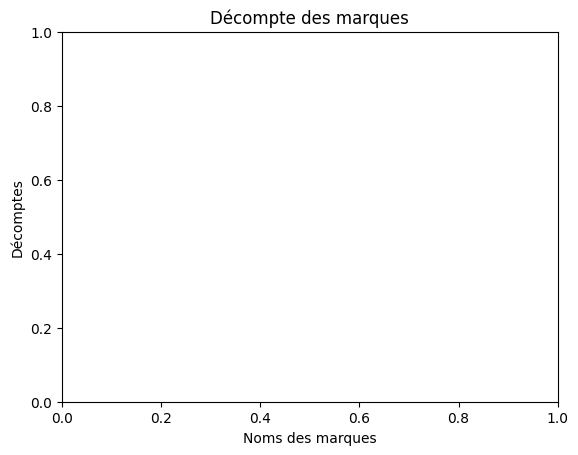

In [30]:
# Ajout de titre et étiquettes au diagramme à barres du décompte des marques
plt.title('Décompte des marques')
plt.xlabel('Noms des marques')
plt.ylabel('Décomptes')
plt.show()

In [31]:
# Conversion des valeurs de la colonne 'Type' en minuscules
shoes_df['Type'] = shoes_df['Type'].str.lower()

In [32]:
# Comptage des occurrences de chaque type de chaussures
shoes_df['Type'].value_counts()

Type
running           332
casual            243
skate             100
fashion            86
lifestyle          76
basketball         52
walking            46
training           34
crossfit           14
trail               6
weightlifting       4
trail running       3
slides              3
retro               3
hiking              2
cross-training      1
racing              1
Name: count, dtype: int64

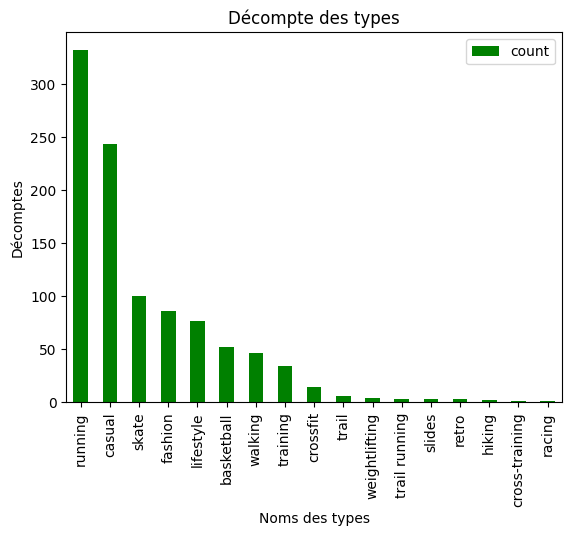

In [33]:
# Tracé du décompte de chaque type de chaussures sous forme de diagramme à barres
shoes_df['Type'].value_counts().plot(kind='bar', legend='false', color='green')

# Ajout de titre et étiquettes au diagramme à barres du décompte des types de chaussures
plt.title('Décompte des types')
plt.xlabel('Noms des types')
plt.ylabel('Décomptes')
plt.show()

In [34]:
# Définition d'une fonction pour catégoriser les types de chaussures
def add_type(inpt):
    if inpt=='casual' or inpt=='fashion' or inpt=='lifestyle' or inpt=='slides' or inpt=='retro':
        return inpt
    else:
        return 'sport'

# Application de la fonction de catégorisation à la colonne 'Type' du DataFrame
shoes_df['Type'] = shoes_df['Type'].apply(add_type)

In [35]:
# Comptage des occurrences de chaque type de chaussures après la catégorisation
shoes_df['Type'].value_counts()

Type
sport        595
casual       243
fashion       86
lifestyle     76
slides         3
retro          3
Name: count, dtype: int64

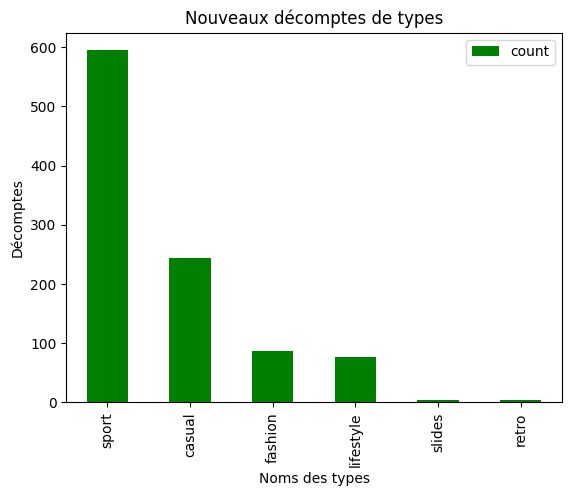

In [36]:
# Tracé du décompte de chaque type de chaussures catégorisé sous forme de diagramme à barres
shoes_df['Type'].value_counts().plot(kind='bar', legend='false', color='green')

# Ajout de titre et étiquettes au diagramme à barres du décompte des types de chaussures catégorisé
plt.title('Nouveaux décomptes de types')
plt.xlabel('Noms des types')
plt.ylabel('Décomptes')
plt.show()


In [37]:
# Comptage des occurrences de chaque genre de chaussures
shoes_df['Gender'].value_counts()

Gender
Men      535
Women    471
Name: count, dtype: int64

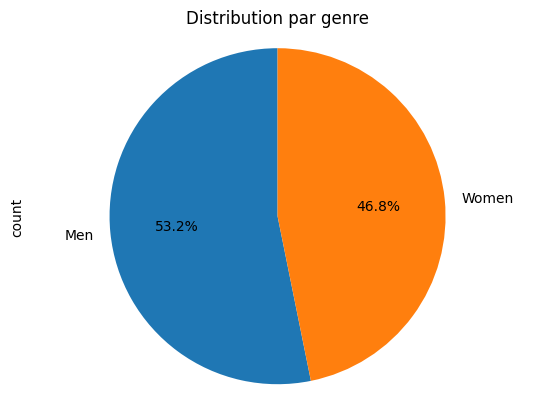

In [38]:
# Tracé de la distribution des genres de chaussures sous forme de diagramme circulaire
shoes_df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Ajout de titre au diagramme circulaire de distribution des genres de chaussures
plt.title('Distribution par genre')
plt.axis('equal')
plt.show()

In [39]:
# Suppression de 'US' de la colonne 'Size' des chaussures
shoes_['Size'] = shoes_df['Size'].str.replace('US', '')

In [42]:
shoes_df.head()

,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,sport,Men,10,Red/Black,Leather,$170.00
1,Adidas,sport,Men,9.5,Black,Primeknit,$180.00
2,Reebok,casual,Men,11,White,Leather,$75.00
3,Converse,casual,Women,8,Navy,Canvas,$55.00
4,Puma,lifestyle,Women,7.5,Pink,Mesh,$80.00


In [43]:
# Conversion des valeurs de la colonne 'Size' en nombres décimaux
shoes_df['Size'] = shoes_df['Size'].astype(float)

In [44]:
# Affichage des informations sur les types de données du DataFrame après conversion
shoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1006 non-null   object 
 1   Type         1006 non-null   object 
 2   Gender       1006 non-null   object 
 3   Size         1006 non-null   float64
 4   Color        1006 non-null   object 
 5   Material     1006 non-null   object 
 6   Price (USD)  1006 non-null   object 
dtypes: float64(1), object(6)
memory usage: 55.1+ KB


In [45]:
# Conversion des valeurs de la colonne 'Color' en minuscules
shoes_df['Color'] = shoes_df['Color'].str.lower()

In [46]:
# Comptage des occurrences de chaque couleur de chaussures
shoes_df['Color'].value_counts()


Color
black              178
white              139
grey               101
black/white        100
pink                64
                  ... 
khaki                1
black/blue           1
grey/purple          1
yellow/black         1
collegiate navy      1
Name: count, Length: 82, dtype: int64

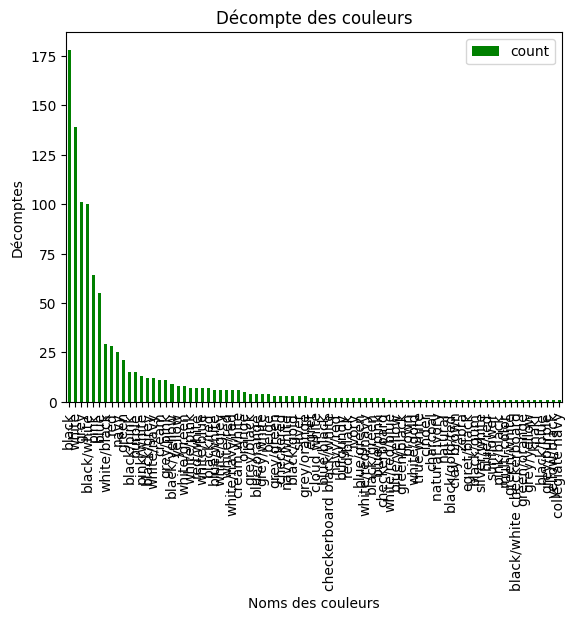

In [47]:
# Tracé du décompte de chaque couleur de chaussures sous forme de diagramme à barres
shoes_df['Color'].value_counts().plot(kind='bar', legend='false', color='green')

# Ajout de titre et étiquettes au diagramme à barres du décompte des couleurs de chaussures
plt.title('Décompte des couleurs')
plt.xlabel('Noms des couleurs')
plt.ylabel('Décomptes')
plt.show()

In [48]:
# Définition d'une fonction pour catégoriser les couleurs de chaussures
def add_Color(inpt):
    if inpt=='black' or inpt=='white' or inpt=='grey' or inpt=='black/white' or inpt=='pink':
        return inpt
    else:
        return 'autre'

# Application de la fonction de catégorisation à la colonne 'Color' du DataFrame
shoes_df['Color'] = shoes_df['Color'].apply(add_Color)

In [49]:
# Comptage des occurrences de chaque couleur de chaussures après la catégorisation
shoes_df['Color'].value_counts()

Color
autre          424
black          178
white          139
grey           101
black/white    100
pink            64
Name: count, dtype: int64

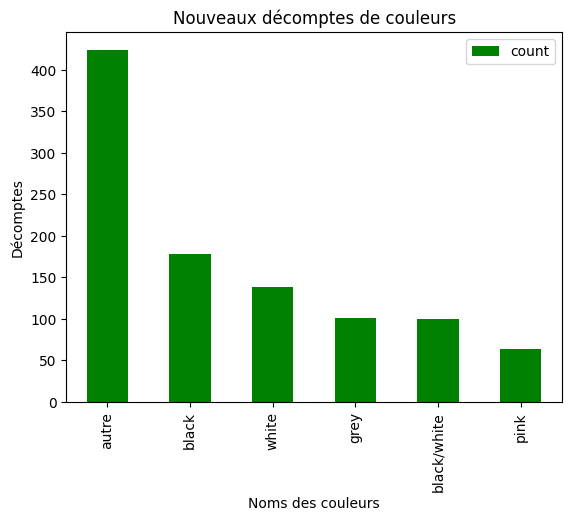

In [50]:
# Tracé du décompte de chaque couleur de chaussures catégorisée sous forme de diagramme à barres
shoes_df['Color'].value_counts().plot(kind='bar', legend='false', color='green')

# Ajout de titre et étiquettes au diagramme à barres du décompte des couleurs de chaussures catégorisée
plt.title('Nouveaux décomptes de couleurs')
plt.xlabel('Noms des couleurs')
plt.ylabel('Décomptes')
plt.show()

In [51]:
# Conversion des valeurs de la colonne 'Material' en minuscules
shoes_df['Material'] = shoes_df['Material'].str.lower()

In [52]:
# Comptage des occurrences de chaque matériau de chaussures
shoes_df['Material'].value_counts()

Material
mesh                    308
leather                 168
canvas                  147
primeknit                68
leather/synthetic        47
synthetic                46
mesh/synthetic           36
suede/mesh               32
suede/canvas             29
suede                    19
flyknit                  17
knit                     15
nylon                    13
canvas/suede              9
synthetic/mesh            7
suede/leather             6
synthetic/leather         6
suede/nylon               5
flexweave                 4
leather/suede             3
nylon/suede               3
suede/textile             3
knit/synthetic            3
synthetic/textile         2
textile/leather           1
canvas/leather            1
flexweave/knit            1
mesh/leather              1
primeknit/synthetic       1
leather/mesh              1
textile                   1
flexweave/cushioning      1
flexweave/synthetic       1
mesh/suede                1
Name: count, dtype: int64

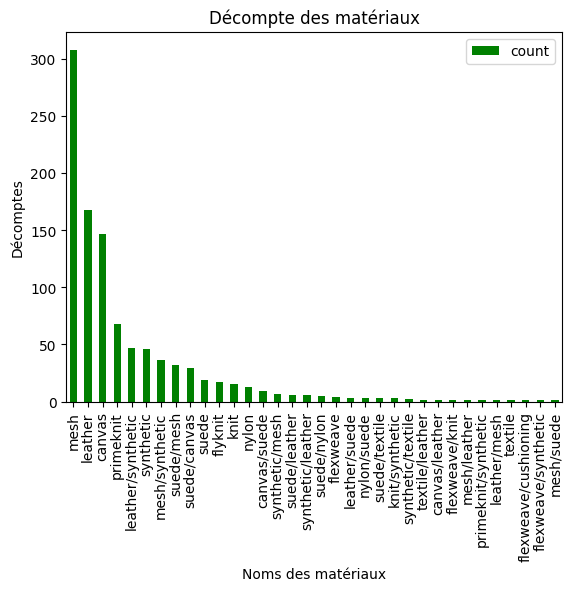

In [54]:
# Tracé du décompte de chaque matériau de chaussures sous forme de diagramme à barres
shoes_df['Material'].value_counts().plot(kind='bar', legend='false', color='green')
plt.title('Décompte des matériaux')
plt.xlabel('Noms des matériaux')
plt.ylabel('Décomptes')
plt.show()

In [57]:
# Définition d'une fonction pour catégoriser les matériaux de chaussures
def add_Material(inpt):
    if inpt=='mech' or inpt=='leather' or inpt=='canvas' or inpt=='primeknit' or inpt=='synthetic' or inpt=='suede' or inpt=='knit' or inpt=='nylon' :
        return inpt
    else :
        return 'autre'

# Application de la fonction de catégorisation à la colonne 'Material' du DataFrame
shoes_df['Material'] = shoes_df['Material'].apply(add_Material)

In [59]:
# Comptage des occurrences de chaque matériau de chaussures après la catégorisation
shoes_df['Material'].value_counts()

Material
autre        530
leather      168
canvas       147
primeknit     68
synthetic     46
suede         19
knit          15
nylon         13
Name: count, dtype: int64

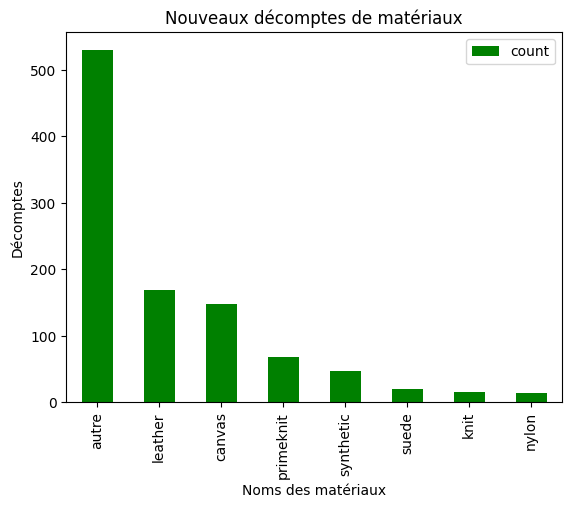

In [61]:


# Tracé du décompte de chaque matériau de chaussures catégorisé sous forme de diagramme à barres
shoes_df['Material'].value_counts().plot(kind='bar', legend='false', color='green')
plt.title('Nouveaux décomptes de matériaux')
plt.xlabel('Noms des matériaux')
plt.ylabel('Décomptes')
plt.show()

In [64]:
# Conversion des valeurs de la colonne 'Price (USD)' en nombres décimaux en supprimant le symbole '$'
shoes_df['Price (USD)'] = shoes_df['Price (USD)'].str.replace('$','').astype(float)

# Affichage des cinq premières lignes du DataFrame après la conversion
shoes_df.head(5)

,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,sport,Men,10.0,autre,leather,170.0
1,Adidas,sport,Men,9.5,black,primeknit,180.0
2,Reebok,casual,Men,11.0,white,leather,75.0
3,Converse,casual,Women,8.0,autre,canvas,55.0
4,Puma,lifestyle,Women,7.5,pink,autre,80.0


<Axes: xlabel='Brand', ylabel='Price (USD)'>

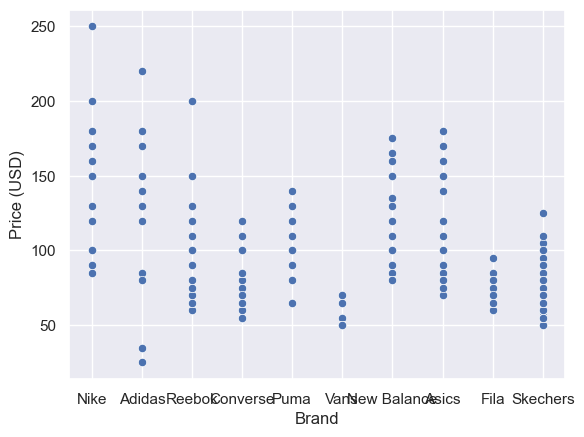

In [66]:
# Configuration du style seaborn
sns.set()
# Création d'un nuage de points de 'Marque' par rapport à 'Prix (USD)'
sns.scatterplot(data=shoes_df, x="Brand", y="Price (USD)")

In [68]:
# Affichage des informations sur le DataFrame
shoes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1006 non-null   object 
 1   Type         1006 non-null   object 
 2   Gender       1006 non-null   object 
 3   Size         1006 non-null   float64
 4   Color        1006 non-null   object 
 5   Material     1006 non-null   object 
 6   Price (USD)  1006 non-null   float64
dtypes: float64(2), object(5)
memory usage: 55.1+ KB


In [71]:
# Encodage one-hot des variables catégoriques dans le DataFrame
shoes_df = pd.get_dummies(shoes_df, dtype=int)

# Affichage des cinq premières lignes du DataFrame après l'encodage
shoes_df.head(5)

# Affichage des informations sur le DataFrame après l'encodage
shoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size                1006 non-null   float64
 1   Price (USD)         1006 non-null   float64
 2   Brand_Adidas        1006 non-null   int32  
 3   Brand_Asics         1006 non-null   int32  
 4   Brand_Converse      1006 non-null   int32  
 5   Brand_Fila          1006 non-null   int32  
 6   Brand_New Balance   1006 non-null   int32  
 7   Brand_Nike          1006 non-null   int32  
 8   Brand_Puma          1006 non-null   int32  
 9   Brand_Reebok        1006 non-null   int32  
 10  Brand_Skechers      1006 non-null   int32  
 11  Brand_Vans          1006 non-null   int32  
 12  Type_casual         1006 non-null   int32  
 13  Type_fashion        1006 non-null   int32  
 14  Type_lifestyle      1006 non-null   int32  
 15  Type_retro          1006 non-null   int32  
 16  Type_s

In [73]:
# Séparation des caractéristiques (x) et de la variable cible (y)
x = shoes_df.drop('Price (USD)', axis=1)
x

,Size,Brand_Adidas,Brand_Asics,Brand_Converse,Brand_Fila,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Skechers,...,Color_pink,Color_white,Material_autre,Material_canvas,Material_knit,Material_leather,Material_nylon,Material_primeknit,Material_suede,Material_synthetic
0,10.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11.0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,8.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,7.5,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,10.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1002,9.5,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1003,7.5,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1004,8.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [75]:

y = shoes_df['Price (USD)']
y

0       170.0
1       180.0
2        75.0
3        55.0
4        80.0
        ...  
1001    130.0
1002    160.0
1003     70.0
1004     55.0
1005    170.0
Name: Price (USD), Length: 1006, dtype: float64